# 台北市道路與車流資料的合併與補值
## 載入必要模組

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

Populating the interactive namespace from numpy and matplotlib


## 載入道路資料

In [2]:
two_way_section_data_df = pd.read_pickle('2_way_section_data_df.pickle')
one_way_section_data_df = pd.read_pickle('1_way_section_data_df.pickle')

In [3]:
len(two_way_section_data_df)

358

In [4]:
len(one_way_section_data_df)

177

In [5]:
len(two_way_section_data_df)+len(one_way_section_data_df)

535

In [6]:
two_way_section_data_df = gpd.GeoDataFrame(two_way_section_data_df)
one_way_section_data_df = gpd.GeoDataFrame(one_way_section_data_df)

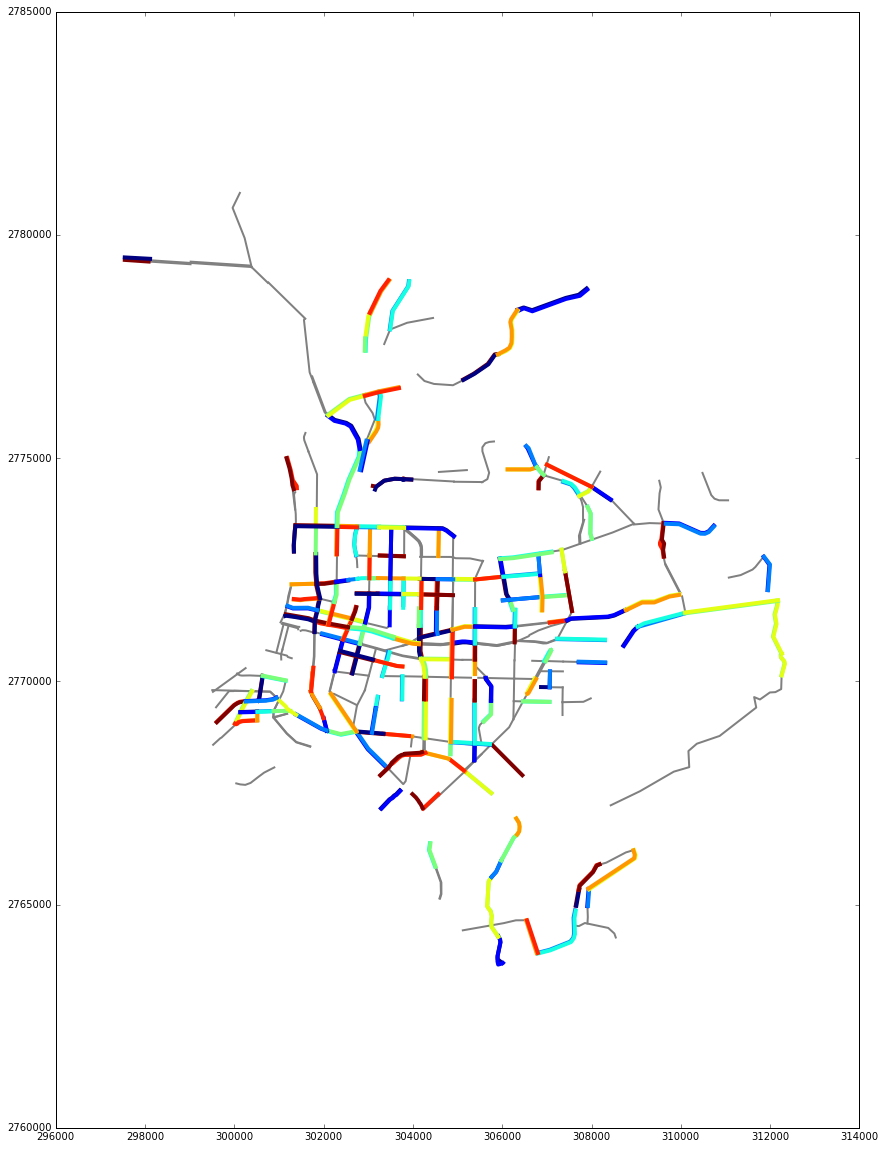

In [7]:
ax = one_way_section_data_df.plot(linewidth= 2, color='gray')
two_way_section_data_df.plot(linewidth= 4,ax =ax)

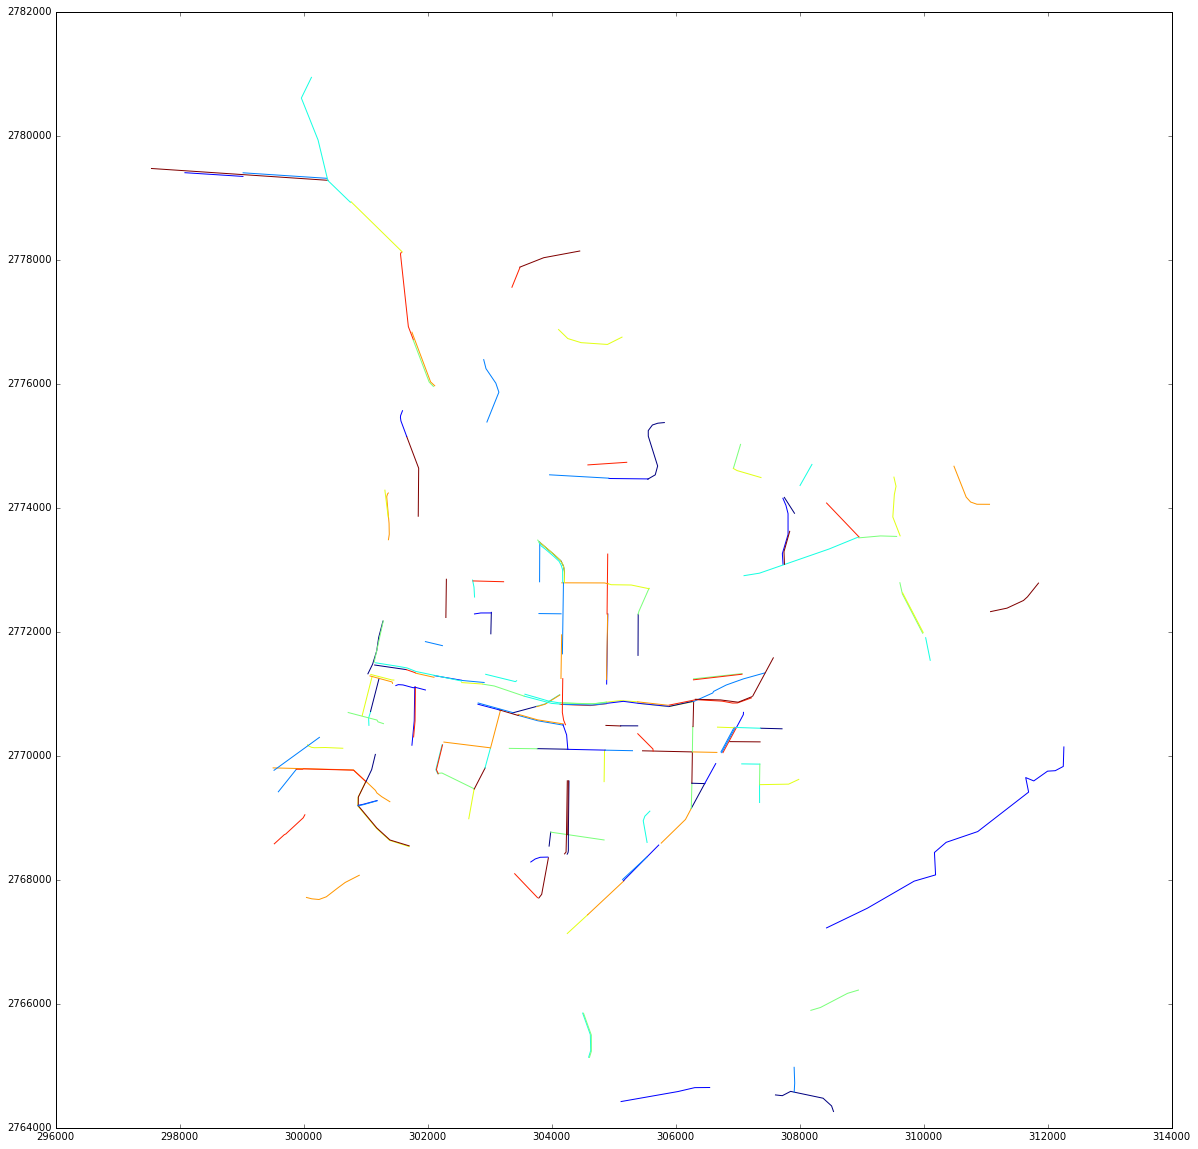

In [8]:
one_way_section_data_df.plot()

## 載入車流資料

In [9]:
car_flow = pd.read_pickle('car_flow.pickle')

In [10]:
car_flow.head(1)

,SectionId,AvgOcc,AvgSpd,TotalVol,StartWgsX,StartWgsY,Timestamp
0,Z0111C0,21.8,41.865852,164.5,121.506955,25.049948,2016-06-07_17:24


In [11]:
car_flow['Timestamp'] = pd.to_datetime(car_flow['Timestamp'], format='%Y-%m-%d_%H:%M')

In [12]:
car_flow = car_flow.set_index('Timestamp')

In [13]:
car_flow.head(1)

,SectionId,AvgOcc,AvgSpd,TotalVol,StartWgsX,StartWgsY
Timestamp,,,,,,
2016-06-07 17:24:00,Z0111C0,21.8,41.865852,164.5,121.506955,25.049948


In [29]:
car_flow.between_time('06:00','08:00').head(1)

,SectionId,AvgOcc,AvgSpd,TotalVol,StartWgsX,StartWgsY
Timestamp,,,,,,
2016-06-08 06:00:00,Z0111C0,6.6,58.555557,72.0,121.506955,25.049948


### 測試：合併全時段車流

In [15]:
totalVol = car_flow.groupby(by='SectionId', as_index=False)['TotalVol'].sum()

In [16]:
two_way_section_data_with_car_flow = pd.merge(two_way_section_data_df, totalVol, left_on='code', right_on='SectionId')

In [17]:
two_way_section_data_with_car_flow.head(1)

,code,name,start,end,geometry,from,to,set,count,offset,problem,SectionId,TotalVol
0,Z1CPB00,辛亥路,POINT (305169.0000001893 2763898.999857932),POINT (305083.000000146 2764498.999857901),LINESTRING (305997.7734111675 2763692.95661411...,木新路,光輝路,"(光輝路, 木新路)",2,"-2.8376657300218815, -19.797667872874808",False,Z1CPB00,102688.0


In [28]:
two_way_section_data_with_car_flow.head(1)

,set,name,geometry,code,set,TotalVol
0,"(三民路, 光復南北路)",健康路,LINESTRING (306894.1597639888 2771892.56646854...,ZM7PP60,"(三民路, 光復南北路)",230268.0


In [27]:
two_way_section_data_with_car_flow.head(1)

,set,name,geometry,code,set,TotalVol
0,"(三民路, 光復南北路)",健康路,LINESTRING (306894.1597639888 2771892.56646854...,ZM7PP60,"(三民路, 光復南北路)",230268.0


In [20]:
group = two_way_section_data_with_car_flow.groupby(by='set', as_index=False)

two_way_section_data_with_car_flow = pd.concat([group[['name', 'geometry', 'code']].first(), group[['TotalVol']].sum()], axis=1)

In [21]:
two_way_section_data_with_car_flow = gpd.GeoDataFrame(two_way_section_data_with_car_flow)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/geopandas-0.1.0.dev_320b75d-py3.4.egg/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


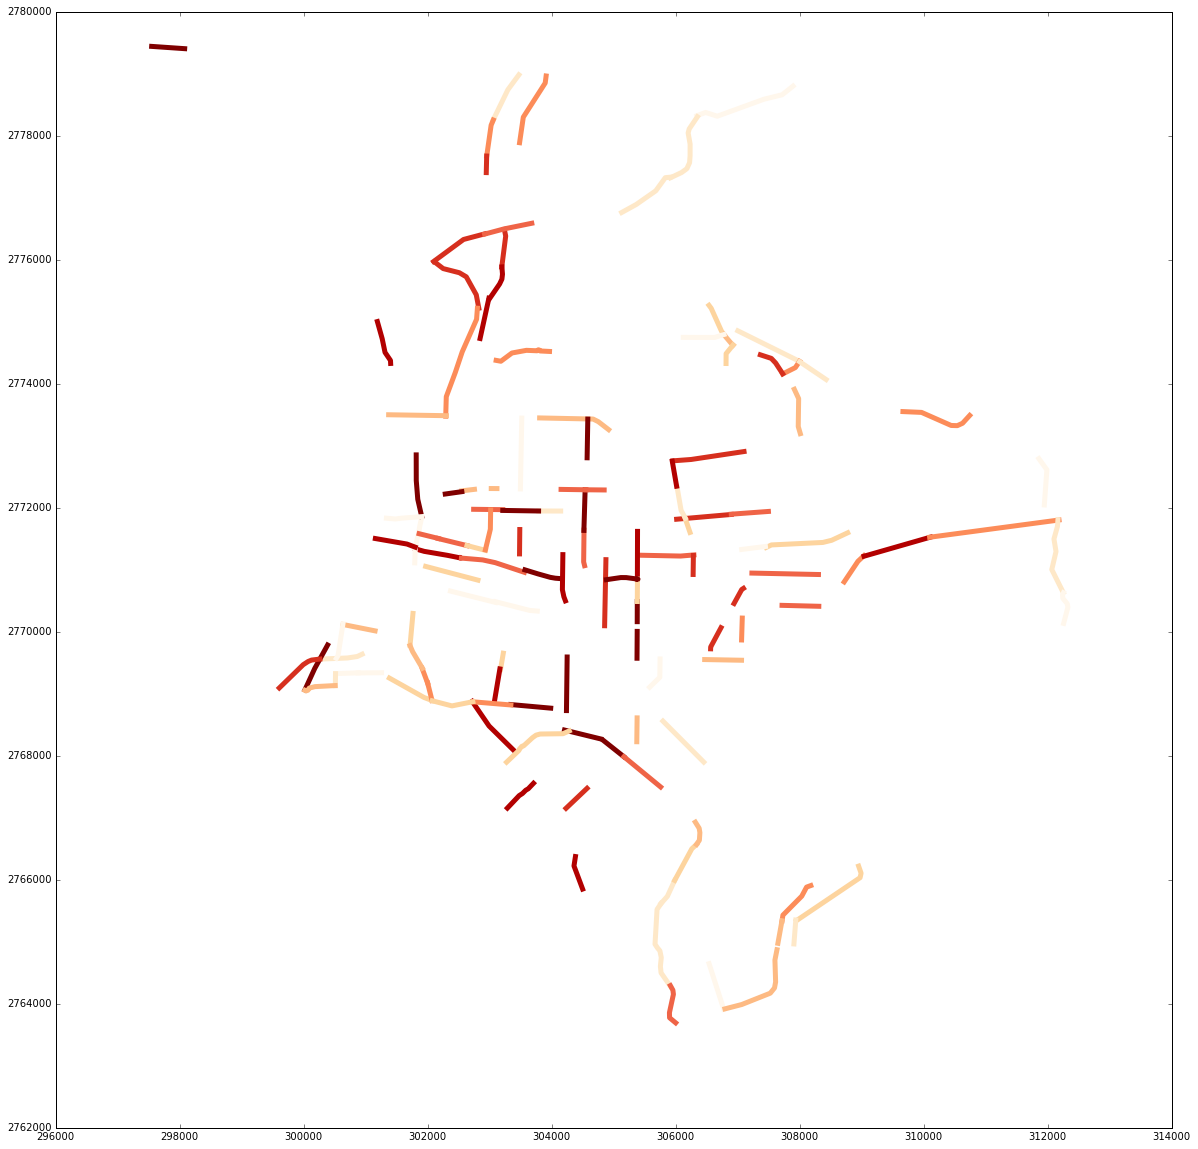

In [22]:
two_way_section_data_with_car_flow.plot(column='TotalVol', scheme='QUANTILES', k=9, colormap='OrRd', linewidth=5)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/geopandas-0.1.0.dev_320b75d-py3.4.egg/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


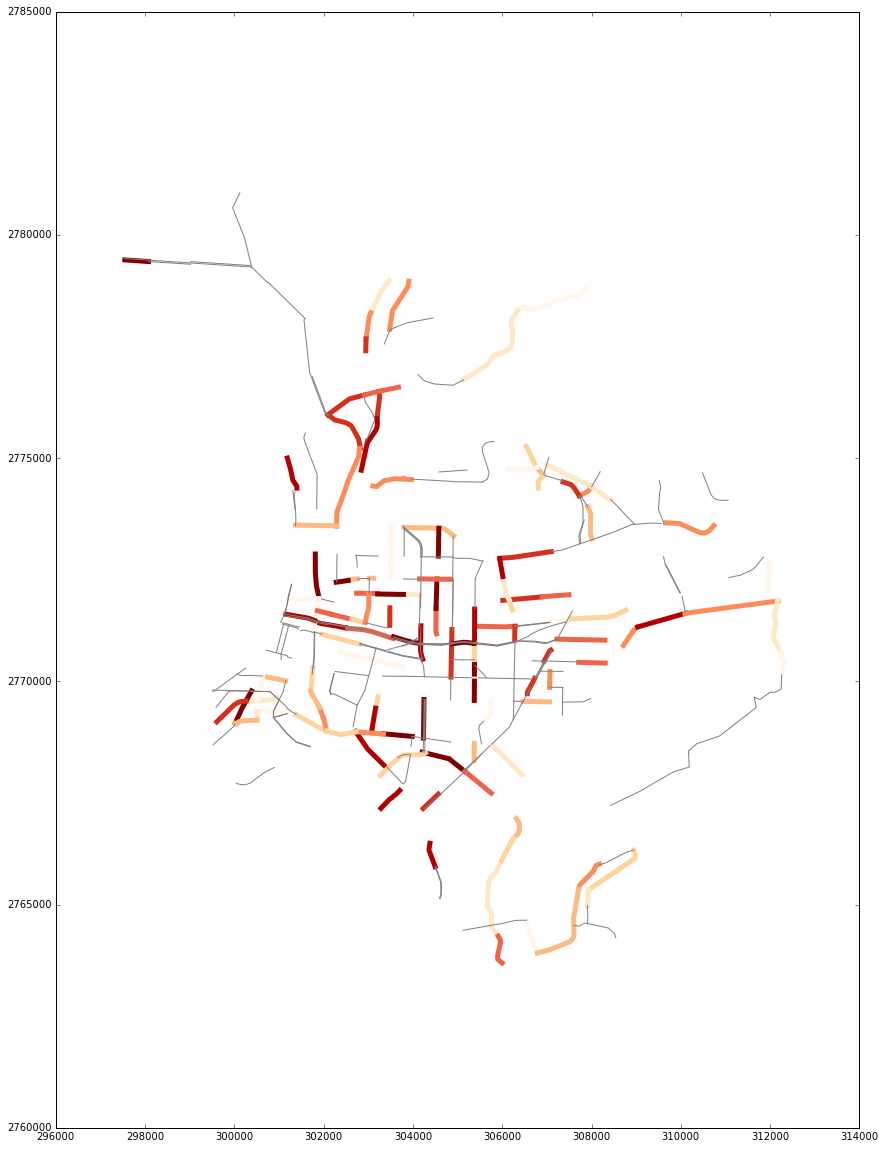

In [23]:
ax = two_way_section_data_with_car_flow.plot(column='TotalVol', scheme='QUANTILES', k=9, colormap='OrRd', linewidth=5)
one_way_section_data_df.plot(ax=ax, color='gray')

In [24]:
two_way_section_data_with_car_flow.columns

Index(['set', 'name', 'geometry', 'code', 'set', 'TotalVol'], dtype='object')

In [25]:
two_way_section_data_with_car_flow.columns = ['set', 'name', 'geometry', 'set_', 'TotalVol']

ValueError: Length mismatch: Expected axis has 6 elements, new values have 5 elements

In [ ]:
two_way_section_data_with_car_flow.head()

In [ ]:
one_way_section_data_df.head()

In [ ]:
all_way_section_data_with_car_flow = pd.concat([two_way_section_data_with_car_flow, one_way_section_data_df])

In [ ]:
all_way_section_data_with_car_flow = all_way_section_data_with_car_flow[['name', 'geometry', 'set', 'TotalVol']].copy()

In [ ]:
all_way_section_data_with_car_flow = gpd.GeoDataFrame(all_way_section_data_with_car_flow)

In [ ]:
all_way_section_data_with_car_flow['centroid'] = all_way_section_data_with_car_flow['geometry'].centroid

In [ ]:
all_way_section_data_with_car_flow['x'] = all_way_section_data_with_car_flow.centroid.apply(lambda t: t.x)
all_way_section_data_with_car_flow['y'] = all_way_section_data_with_car_flow.centroid.apply(lambda t: t.y)

In [ ]:
road_direction = all_way_section_data_with_car_flow.groupby(by='name')

In [ ]:
width = road_direction['x'].max() - road_direction['x'].min() 

In [ ]:
height = road_direction['y'].max() - road_direction['y'].min() 

In [ ]:
road_direction = pd.DataFrame({
        'width': width, 
        'height': height
    })

In [ ]:
road_direction['direction'] = road_direction['height'] - road_direction['width']

In [ ]:
def f(t):
    if  t < 0: return '東西向'
    elif t > 0: return '南北向'
    else: return '無'

road_direction['direction'] = road_direction['direction'].apply(f)

In [ ]:
road_direction

In [ ]:
南北向道路 = road_direction[road_direction['direction'] == '南北向'].index

In [ ]:
all_way_section_data_with_car_flow.head(1)

In [ ]:
road_df = all_way_section_data_with_car_flow[all_way_section_data_with_car_flow.name.apply(lambda t: t in 南北向道路)]

In [ ]:
len(road_df[road_df['TotalVol'].isnull()])

In [ ]:
ax = road_df[road_df['TotalVol'].isnull()].plot(color='gray')
road_df[~road_df['TotalVol'].isnull()].plot(column='TotalVol', scheme='QUANTILES', k=9, colormap='OrRd', linewidth=5, ax=ax)

In [ ]:
result = gpd.GeoDataFrame()

for road in 南北向道路:
    road_df = all_way_section_data_with_car_flow[all_way_section_data_with_car_flow['name']==road].copy()
    road_df = road_df.sort_values(by='y')
    road_df = road_df.set_index('y')
    road_df['TotalVol'] = road_df[['TotalVol']].apply(lambda t: t.interpolate(method='barycentric'))['TotalVol']
    result = result.append(road_df)

In [ ]:
road_df_南北向道路 = gpd.GeoDataFrame(result)

In [ ]:
len(result[result['TotalVol'].isnull()])

In [ ]:
ax = road_df_南北向道路[road_df_南北向道路['TotalVol'].isnull()].plot(color='gray')
road_df_南北向道路[~road_df_南北向道路['TotalVol'].isnull()].plot(column='TotalVol', scheme='QUANTILES', k=9, colormap='OrRd', linewidth=5, ax=ax)

In [ ]:
東西向道路 = road_direction[road_direction['direction'] == '東西向'].index

In [ ]:
road_df = all_way_section_data_with_car_flow[all_way_section_data_with_car_flow.name.apply(lambda t: t in 東西向道路)]

In [ ]:
ax = road_df[road_df['TotalVol'].isnull()].plot(color='gray')
road_df[~road_df['TotalVol'].isnull()].plot(column='TotalVol', scheme='QUANTILES', k=9, colormap='OrRd', linewidth=5, ax=ax)

In [ ]:
len(road_df[road_df['TotalVol'].isnull()])

In [ ]:
result = gpd.GeoDataFrame()

for road in 東西向道路:
    road_df = all_way_section_data_with_car_flow[all_way_section_data_with_car_flow['name']==road].copy()
    road_df = road_df.sort_values(by='y')
    road_df = road_df.set_index('y')
    road_df['TotalVol'] = road_df[['TotalVol']].apply(lambda t: t.interpolate(method='barycentric'))['TotalVol']
    result = result.append(road_df)

In [ ]:
road_df_東西向道路 = gpd.GeoDataFrame(result)

In [ ]:
ax = road_df_東西向道路[road_df_東西向道路['TotalVol'].isnull()].plot(color='gray')
road_df_東西向道路[~road_df_東西向道路['TotalVol'].isnull()].plot(column='TotalVol', scheme='QUANTILES', k=9, colormap='OrRd', linewidth=5, ax=ax)

In [ ]:
len(road_df_東西向道路[road_df_東西向道路['TotalVol'].isnull()])

In [ ]:
無 = road_direction[road_direction['direction'] == '無'].index

In [ ]:
road_df_無 = all_way_section_data_with_car_flow[all_way_section_data_with_car_flow['name'].apply(lambda t: t in 無)]

In [ ]:
road_df = gpd.GeoDataFrame(pd.concat([road_df_南北向道路, road_df_東西向道路, road_df_無]))

In [ ]:
ax = road_df[road_df['TotalVol'].isnull()].plot(color='gray')
road_df[~road_df['TotalVol'].isnull()].plot(column='TotalVol', scheme='QUANTILES', k=9, colormap='OrRd', linewidth=5, ax=ax)

In [ ]:
road_df

In [ ]:
road_df.to_pickle('road_merge.pickle')

In [ ]:
road_df